___
<img style="float: right; margin: 0px 0px 15px 15px;" src="https://ichi.pro/assets/images/max/724/0*INqwwHXgTabQx7wM.png" width="350px" height="180px" />


# <font color= #8A0829> Data modelling lab </font>
- <Strong> Teacher: Sara Eugenia Rodríguez </Strong>
- <Strong> Year </Strong>: 2023

___

<p style="text-align:right;"> Imagen from: https://ichi.pro/assets/images/max/724/0*INqwwHXgTabQx7wM.png</p>

### <font color= #2E9AFE> Support Vector Machines for Classification</font> 

**What it is?**


The objective of this algorithm is find an hiperplane in a N-dimensial space that classifies data

We look for the hiperplane with the highest distances between classes

<img style="float: center; margin: 15px 15px 0px 0px;" src="https://miro.medium.com/max/600/0*9jEWNXTAao7phK-5.png" width="250px" height="80px" />

<img style="float: center; margin: 0px 0px 15px 15px;" src="https://miro.medium.com/max/600/0*0o8xIA4k3gXUDCFU.png" width="250px" height="80px" />


**Which concepts does it uses?**

-  "Maximal Margin Classifier"
-  Hiperplane concept
-  If we have combined classes

**The ecuation**

$$
\min _{\mathbf{w}, b}\|\mathbf{w}\|^{2}+C \sum_{i=1}^{n} \xi_{i}^{p} \text { under constraints } y_{i}\left(\mathbf{w} \cdot \mathbf{x}_{i}+b\right) \geq 1-\xi_{i}, \quad \xi_{i} \geq 0
$$




<img style="float: center; margin: 0px 0px 15px 15px;" src="https://miro.medium.com/max/838/1*gXvhD4IomaC9Jb37tzDUVg.png" width="450px" height="280px" />


**Some kernels we could use**
- Lineal
$$K(x,x*)=x \cdot x^{*}$$
- Polinomial 
$$K(x,x*)=(x \cdot x^{*} +1)^{d}$$
- Gaussian Radial Basis 
$$K(x,x*)=\exp^{-\frac{\|x-x^{*}\|^{2}}{2\sigma^{2}}}=\exp^{-\gamma\|x-x^{*}\|^{2}} $$


**We have to comply with some rules to get the optimal model**


- Cleand and scaled data
- Not for big data because of training time


#### Lineal Kernel

In [1]:
#Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
# use seaborn plotting defaults
import seaborn as sns; sns.set()

What would happen if we have dirty data or combined classes

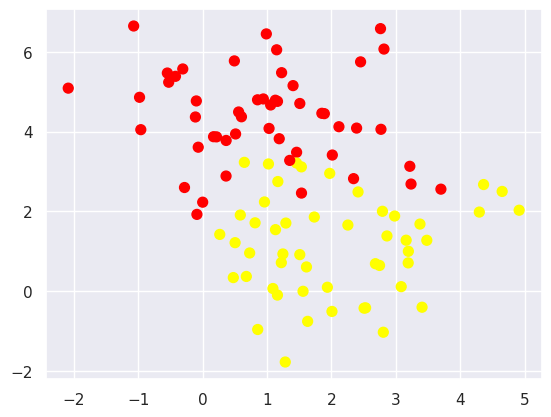

In [2]:
#data
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2) 
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

In [3]:
X.shape

(100, 2)

In [4]:
y

array([1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1])

In [5]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot decision function for a SVC in 2 dimensions"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    

    # Grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    

    # Plot decision limits and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # Plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

To handle this case, SVM has a factor that softens the margin. It permits that some records are not correctly classified in a way that we can get better predictions

Strictness of margin is denoted by C

The bigger the C, it permits less classification errors


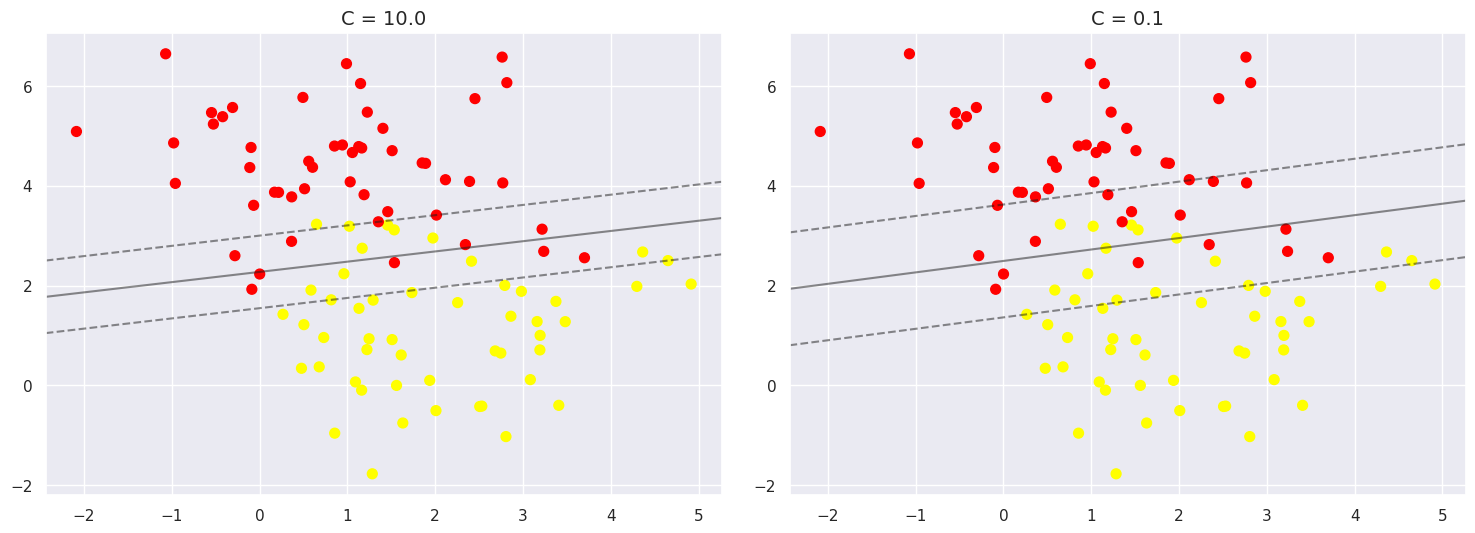

In [6]:
#Plot SVM
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

#Try with different parameters (C=10, C=0.1)
for axi, C in zip(ax, [10.0, 0.1]):
    model = svm.SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

Optimal C Value depends on the data and has to be tuned with Cross-Validations

#### Example 2 - Various types of kernels

In [7]:
#Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model,svm
from sklearn.metrics import (accuracy_score,
                             precision_score,
                             recall_score)
import pandas as pd


In [8]:
#Performance test
def eval_perform(Y,Yhat):
    accu = accuracy_score(Y,Yhat)
    prec = precision_score(Y,Yhat,average='weighted')
    reca = recall_score(Y,Yhat,average='weighted')
    print('\n \t Accu \t Prec \t Reca\n Eval \t %0.3f \t %0.3f \t %0.3f'%(accu,prec,reca))

In [9]:
#Import data
data = pd.read_csv('ex2data2.txt',header=None)
X = data.iloc[:,0:2]
Y = data.iloc[:,2]

In [10]:
X

,0,1
0,0.051267,0.699560
1,-0.092742,0.684940
2,-0.213710,0.692250
3,-0.375000,0.502190
4,-0.513250,0.465640
...,...,...
113,-0.720620,0.538740
114,-0.593890,0.494880
115,-0.484450,0.999270
116,-0.006336,0.999270


In [11]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
113    0
114    0
115    0
116    0
117    0
Name: 2, Length: 118, dtype: int64

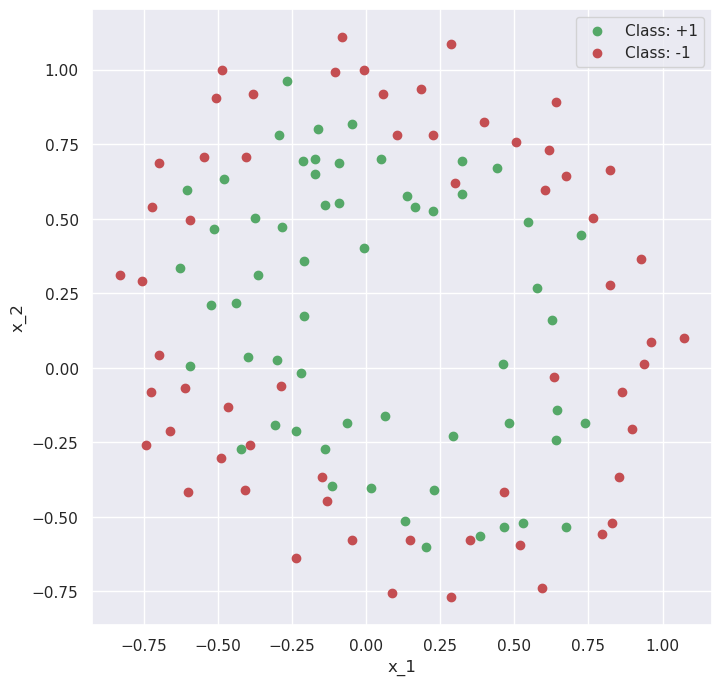

In [12]:
#Data visualization
fig = plt.figure(figsize=(8,8))
indx = Y==1
plt.scatter(X[0][indx],X[1][indx],c='g',label='Class: +1')
plt.scatter(X[0][~indx],X[1][~indx],c='r',label='Class: -1')
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.legend()
plt.show()


In [13]:
#We'll test models with different kernels to see which kernels fit the data better

#modelo = svm.SVC(kernel='linear')
#modelo = svm.SVC(kernel='poly',degree=10,C=1)
modelo = svm.SVC(kernel='rbf',C=1000,gamma='auto') #rbf #radial was the best kernel
modelo.fit(X,Y)

Yhat = modelo.predict(X)

eval_perform(Y,Yhat)


 	 Accu 	 Prec 	 Reca
 Eval 	 0.856 	 0.859 	 0.856


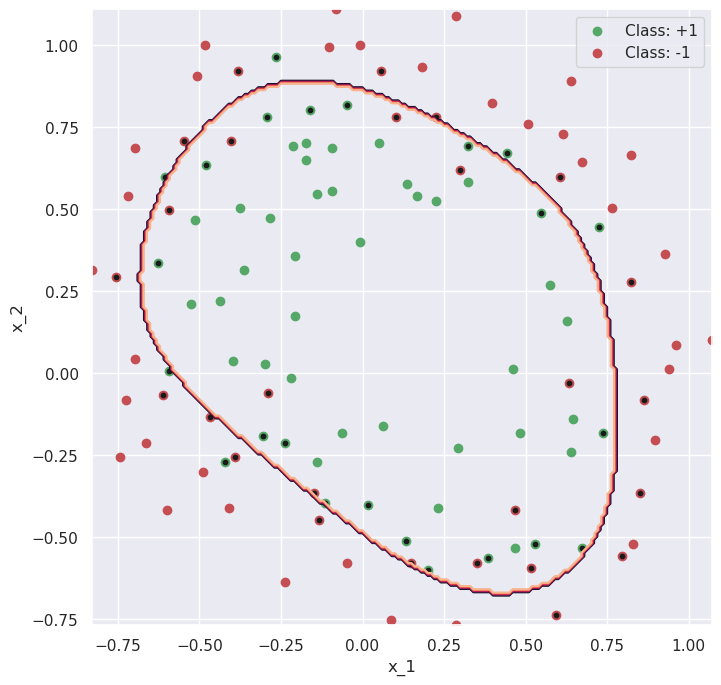

In [14]:
#Watch decision limit
h = 0.01
xmin,xmax,ymin,ymax = X[0].min(),X[0].max(),X[1].min(),X[1].max()
xx,yy = np.meshgrid(np.arange(xmin,xmax,h),np.arange(ymin,ymax,h))

Xnew = pd.DataFrame(np.c_[xx.ravel(),yy.ravel()])

Z = modelo.predict(Xnew)
Z = Z.reshape(xx.shape)

vs = modelo.support_vectors_

indx = Y==1
fig = plt.figure(figsize=(8,8))
plt.scatter(X[0][indx],X[1][indx],c='g',label='Class: +1')
plt.scatter(X[0][~indx],X[1][~indx],c='r',label='Class: -1')
plt.contour(xx,yy,Z)
plt.scatter(vs[:,0],vs[:,1],s=10,facecolors='k')
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.legend()
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)
plt.show()


#### Example: Facial recognition


In [15]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


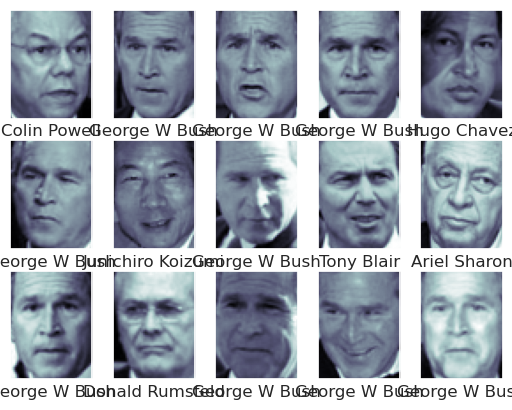

In [16]:
#Plotting some faces
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

In [17]:
faces.images

array([[[0.53333336, 0.52418303, 0.49673203, ..., 0.2653595 ,
         0.2653595 , 0.26013073],
        [0.56993467, 0.545098  , 0.4797386 , ..., 0.2627451 ,
         0.2627451 , 0.26013073],
        [0.5882353 , 0.5398693 , 0.475817  , ..., 0.2640523 ,
         0.26013073, 0.25751635],
        ...,
        [0.59738564, 0.7176471 , 0.40261438, ..., 0.00653595,
         0.00261438, 0.00392157],
        [0.44575164, 0.793464  , 0.67058825, ..., 0.00522876,
         0.00653595, 0.00522876],
        [0.29673204, 0.69803923, 0.84313726, ..., 0.00653595,
         0.00653595, 0.00130719]],

       [[0.28627452, 0.20784314, 0.2535948 , ..., 0.28496733,
         0.3620915 , 0.30457518],
        [0.24836601, 0.22745098, 0.33594772, ..., 0.27189544,
         0.34901962, 0.30588236],
        [0.29281047, 0.3006536 , 0.37908497, ..., 0.25751635,
         0.33594772, 0.32941177],
        ...,
        [0.10718954, 0.10326798, 0.08104575, ..., 0.95032674,
         0.9267974 , 0.90718955],
        [0.0

In [18]:
pd.DataFrame(faces.data)

,0,1,2,3,4,5,6,7,8,9,...,2904,2905,2906,2907,2908,2909,2910,2911,2912,2913
0,0.533333,0.524183,0.496732,0.467974,0.453595,0.464052,0.487582,0.516340,0.532026,0.558170,...,0.461438,0.070588,0.011765,0.010458,0.005229,0.000000,0.003922,0.006536,0.006536,0.001307
1,0.286275,0.207843,0.253595,0.362092,0.366013,0.264052,0.396078,0.499346,0.484967,0.496732,...,0.960784,0.983007,0.993464,0.994771,0.990850,0.994771,0.988235,0.969935,0.950327,0.934641
2,0.316340,0.389542,0.275817,0.192157,0.371242,0.466667,0.479739,0.499346,0.504575,0.526797,...,0.321569,0.352941,0.420915,0.454902,0.483660,0.464052,0.380392,0.426144,0.789542,0.955555
3,0.258824,0.307190,0.483660,0.533333,0.542484,0.554248,0.555556,0.577778,0.626144,0.677124,...,0.346405,0.390850,0.665359,0.915033,0.917647,0.896732,0.903268,0.903268,0.884967,0.800000
4,0.222222,0.220915,0.185621,0.184314,0.200000,0.175163,0.171242,0.200000,0.248366,0.213072,...,0.163399,0.156863,0.146405,0.134641,0.133333,0.134641,0.133333,0.135948,0.141176,0.133333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1343,0.213072,0.216993,0.209150,0.250980,0.325490,0.433987,0.551634,0.626144,0.644444,0.657516,...,0.328105,0.383007,0.358170,0.366013,0.376471,0.366013,0.352941,0.351634,0.371242,0.450980
1344,0.358170,0.350327,0.318954,0.307190,0.352941,0.454902,0.575163,0.662745,0.716340,0.725490,...,0.232680,0.227451,0.206536,0.189542,0.183007,0.185621,0.197386,0.215686,0.215686,0.177778
1345,0.116340,0.111111,0.101961,0.171242,0.363399,0.383007,0.334641,0.277124,0.473203,0.622222,...,0.525490,0.524183,0.516340,0.525490,0.555556,0.584314,0.568627,0.566013,0.579085,0.554248
1346,0.193464,0.210458,0.291503,0.349020,0.291503,0.281046,0.376471,0.456209,0.426144,0.294118,...,0.589543,0.640523,0.631373,0.641830,0.686275,0.762091,0.749020,0.687582,0.657516,0.590850


Each image size is [62x47] or 3k pixels each. 3k would be a lot of variables, so we'll use PCA to get the most important variables for our model

In [19]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

pca = PCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

In [20]:
#Dtrain-test split
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,
                                                random_state=42)

Grid search to fit 2 parameters

- C - Margin strictness
- Gamma - Controls kernel size


In [21]:
#grid search to fit hiperparameters

from sklearn.model_selection import GridSearchCV

param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]} #Generally they are values smaller than 1

grid = GridSearchCV(model, param_grid)

grid.fit(Xtrain, ytrain)
print(grid.best_params_)

{'svc__C': 5, 'svc__gamma': 0.001}


Now that we have the best model, let's predict

In [22]:
model = grid.best_estimator_ #Model with optimal hiperparameters
yfit = model.predict(Xtest)

In [23]:
#Predictions
yfit

array([3, 4, 3, 6, 6, 1, 3, 3, 3, 1, 3, 3, 0, 3, 2, 1, 7, 2, 3, 2, 7, 7,
       5, 5, 0, 3, 6, 7, 3, 3, 0, 6, 3, 2, 2, 3, 2, 7, 3, 2, 3, 3, 7, 1,
       3, 3, 0, 2, 1, 2, 7, 3, 7, 6, 7, 3, 7, 1, 7, 0, 4, 2, 7, 2, 5, 4,
       7, 3, 4, 1, 1, 5, 4, 1, 3, 4, 0, 4, 3, 3, 1, 3, 1, 0, 3, 2, 3, 2,
       7, 1, 1, 1, 2, 7, 3, 7, 7, 3, 3, 1, 3, 7, 1, 4, 3, 3, 0, 3, 7, 0,
       3, 1, 0, 7, 7, 1, 3, 2, 7, 4, 7, 7, 5, 2, 3, 3, 3, 3, 2, 2, 3, 7,
       0, 3, 4, 3, 4, 1, 2, 1, 7, 6, 5, 3, 3, 1, 1, 3, 5, 4, 3, 2, 7, 1,
       7, 1, 3, 0, 1, 4, 6, 1, 2, 3, 2, 3, 1, 7, 2, 2, 1, 7, 2, 3, 1, 1,
       1, 3, 3, 1, 0, 4, 1, 1, 7, 1, 1, 5, 3, 4, 3, 3, 7, 5, 6, 3, 7, 4,
       3, 2, 0, 3, 2, 3, 3, 6, 3, 3, 1, 7, 3, 6, 1, 2, 3, 1, 1, 7, 6, 3,
       1, 3, 4, 7, 7, 2, 7, 7, 5, 7, 1, 3, 3, 7, 4, 4, 7, 2, 3, 1, 3, 4,
       3, 1, 4, 3, 1, 1, 5, 1, 2, 3, 4, 1, 1, 1, 2, 2, 3, 7, 3, 7, 3, 7,
       3, 1, 3, 1, 3, 1, 1, 1, 3, 3, 1, 4, 4, 3, 1, 4, 1, 0, 0, 3, 2, 0,
       2, 5, 1, 3, 3, 6, 7, 2, 3, 6, 3, 1, 1, 5, 1,

In [24]:
#Real data
ytest

array([3, 4, 3, 6, 6, 1, 3, 3, 3, 1, 3, 3, 0, 3, 3, 1, 7, 2, 3, 2, 7, 3,
       5, 5, 0, 3, 6, 7, 3, 3, 0, 6, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 7, 1,
       3, 3, 5, 1, 1, 2, 7, 3, 5, 6, 7, 3, 7, 1, 7, 0, 4, 2, 4, 2, 5, 4,
       7, 3, 4, 3, 1, 3, 4, 1, 3, 5, 0, 4, 3, 3, 3, 3, 1, 0, 3, 2, 3, 2,
       7, 1, 1, 3, 2, 7, 3, 1, 7, 3, 3, 3, 3, 7, 3, 4, 3, 3, 0, 3, 7, 3,
       3, 1, 0, 7, 7, 1, 3, 2, 7, 4, 7, 7, 5, 2, 3, 3, 3, 3, 3, 2, 3, 7,
       0, 3, 4, 3, 4, 1, 3, 3, 7, 6, 5, 3, 3, 1, 1, 3, 5, 4, 3, 2, 1, 1,
       7, 1, 3, 7, 1, 4, 6, 1, 1, 3, 2, 3, 1, 7, 0, 2, 1, 7, 1, 3, 1, 1,
       1, 3, 3, 1, 1, 4, 1, 1, 7, 1, 1, 5, 3, 3, 3, 3, 4, 5, 6, 3, 7, 3,
       3, 2, 0, 3, 2, 3, 3, 6, 3, 3, 1, 7, 3, 6, 1, 2, 3, 1, 1, 7, 4, 3,
       1, 1, 5, 7, 7, 2, 2, 7, 5, 7, 1, 3, 3, 7, 3, 4, 7, 4, 3, 1, 3, 4,
       5, 1, 4, 3, 2, 1, 5, 3, 2, 3, 4, 1, 1, 1, 0, 2, 3, 7, 3, 7, 3, 7,
       3, 1, 3, 1, 3, 2, 1, 1, 3, 3, 1, 3, 4, 3, 1, 4, 1, 5, 0, 3, 2, 0,
       2, 5, 1, 3, 3, 6, 2, 2, 3, 6, 3, 1, 3, 5, 1,

Some test images with ther predictions

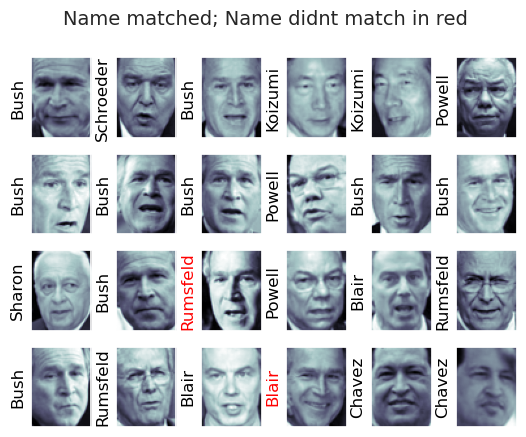

In [25]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Name matched; Name didnt match in red', size=14);

Classification report

In [26]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.87      0.74        15
     Colin Powell       0.83      0.88      0.86        68
  Donald Rumsfeld       0.70      0.84      0.76        31
    George W Bush       0.97      0.80      0.88       126
Gerhard Schroeder       0.76      0.83      0.79        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.86      1.00      0.92        12
       Tony Blair       0.82      0.98      0.89        42

         accuracy                           0.85       337
        macro avg       0.82      0.86      0.83       337
     weighted avg       0.86      0.85      0.85       337



**Advantages of support vector classifier**

- Low memory models
- After training, predictions are fast
- Works great with data that has more variables than records
- Su integración con el truco del kernel los hacen métodos muy versátiles, lo cual hace que se adapten a muchos tipos de datos. 
- Kernel trick make the model pretty adaptable to different data types

**Disadvantages**
- Training time is long
- Result are really dependant on C
- Result doesn't have probability, just a category
